In [1]:
#Description: This program detects breast cancer, based off of data.

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import os
import cv2
import albumentations as A

# 1. Load and prepare data

In [22]:
path=os.listdir('data/BreastCancerImg/train')
classes={'healthy':0,'sick':1}

In [23]:
X=[]
Y=[]
for cls in classes:
    pth='data/BreastCancerImg/train/'+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        X.append(img)
        Y.append(classes[cls])

In [24]:
X=np.array(X)
Y=np.array(Y)

In [25]:
X.shape

(1400, 250, 540)

In [26]:
X_updated=X.reshape(len(X),-1)

In [27]:
X_updated.shape

(1400, 135000)

# 2. Data Analysis

In [28]:
np.unique(Y)

array([0, 1])

In [29]:
X=np.array(X)
Y=np.array(Y)

In [30]:
pd.Series(Y).value_counts()

0    700
1    700
dtype: int64

# 3. Data Visualization

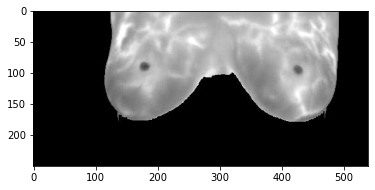

In [31]:
plt.imshow(X[5],cmap='gray')

# 4. Split data

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [33]:
xtrain.shape, xtest.shape

((1120, 135000), (280, 135000))

# 5. Feature Scaling 

In [34]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# 6. Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [36]:
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [37]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

# 7. Evaluation

In [38]:
print("Training Score: ", lg.score(xtrain,ytrain))
print("Testing Score: ", lg.score(xtest,ytest))

Training Score:  1.0
Testing Score:  0.95


In [39]:
print("Training Score: ", sv.score(xtrain,ytrain))
print("Testing Score: ", sv.score(xtest,ytest))

Training Score:  0.9901785714285715
Testing Score:  0.9714285714285714


# 8. Prediction

In [40]:
pred=sv.predict(xtest)

In [41]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 20,  52,  80, 156, 168, 174, 202, 276], dtype=int64),)

In [42]:
print("Total Misclassified Samples: ", len(misclassified[0]))
print(pred[20],ytest[20])

Total Misclassified Samples:  8
0 1


# 9. Testing 

In [43]:
dec={0:'Healthy',1:'Sick'}

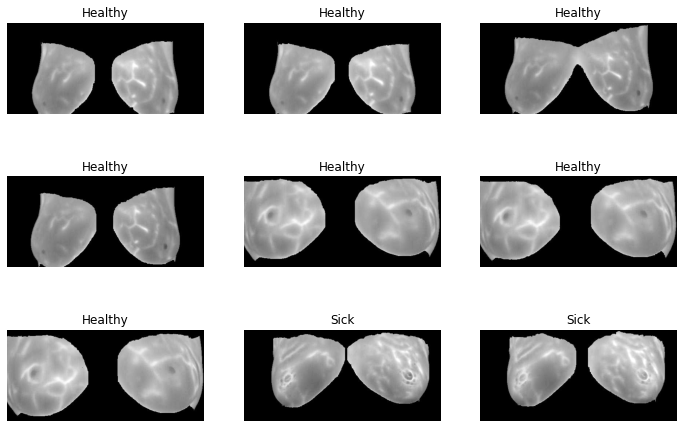

In [44]:
plt.figure(figsize=(12,8))
p=os.listdir('data/BreastCancerImg/validation')
c=1
for i in os.listdir('data/BreastCancerImg/validation/Healthy/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('data/BreastCancerImg/validation/Healthy/'+i,0)
    img1 = cv2.resize(img,(540,250))
    img1 = img.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

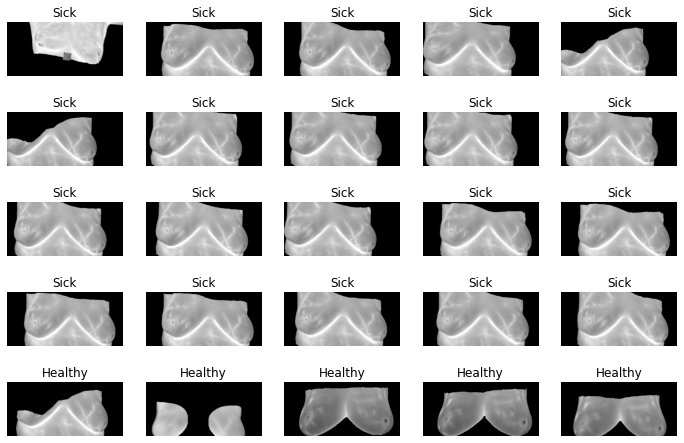

In [47]:
plt.figure(figsize=(12,8))
p=os.listdir('data/BreastCancerImg/validation/')
c=1
for i in os.listdir('data/BreastCancerImg/validation/Sick/')[0:25]:
    plt.subplot(5,5,c)
    
    img=cv2.imread('data/BreastCancerImg/validation/Sick/'+i,0)
    img1=cv2.resize(img,(540,250))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1